In [ ]:
!pip install qiskit
!pip install qiskit_machine_learning
!pip install qiskit_algorithm
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 520.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512616 sha256=85d099269c759b541e9c220960a7d2fc9b4598fdd207e244a84b13717fd15596
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZFeatureMap, RealAmplitudes, TwoLocal, PauliTwoDesign, PauliFeatureMap
from qiskit_machine_learning.algorithms import VQC
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
from qiskit.primitives import Sampler
import time

In [2]:
iris = load_iris()

X, Y = iris['data'], iris['target']

X_scaled = MinMaxScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

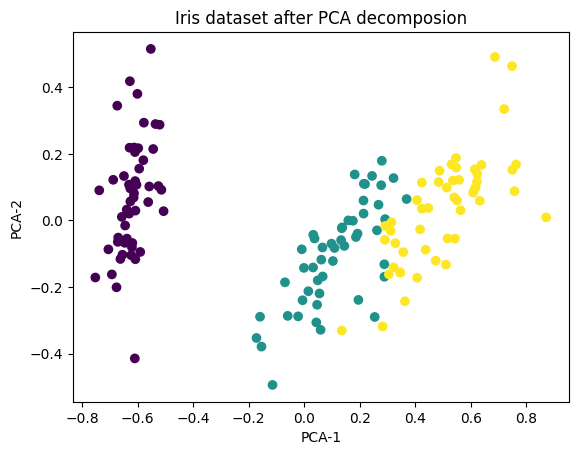

In [3]:
pca = PCA(n_components=2).fit_transform(X_scaled)

plt.scatter(pca[:,0], pca[:,1], c=Y)
plt.title('Iris dataset after PCA decomposion')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.show()

# **ZFeatureMap/RealAmplitudes**

In [3]:
MAXITR = 100
num_qubits = X.shape[1]
opt = COBYLA(maxiter=MAXITR)

In [ ]:
featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'ixq.json' not found in any of these locations: /usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/styles/ixq.json, ixq.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


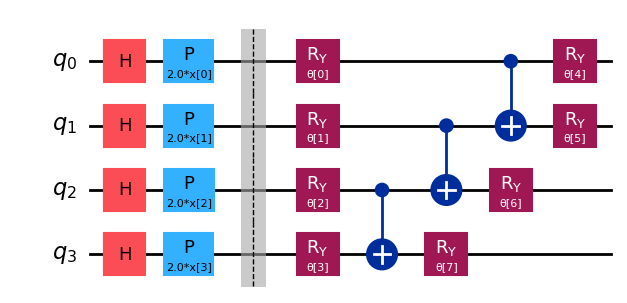

In [ ]:
qc = QuantumCircuit(num_qubits)
qc.compose(featuremap, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)
qc.decompose().draw(output='mpl', style='ixq')

In [4]:
objective_func_vals = []

def callback_graph(weights, obj_func_eval):
  clear_output(wait=True)
  objective_func_vals.append(obj_func_eval)
  plt.title("Objective function value against iteration")
  plt.xlabel("Iteration")
  plt.ylabel("Objective function value")
  plt.plot(range(len(objective_func_vals)), objective_func_vals)
  plt.show()

In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []

In [ ]:
vqc = VQC(
    feature_map=featuremap,
    ansatz=ansatz,
    optimizer=opt,
    callback=callback_graph,
)

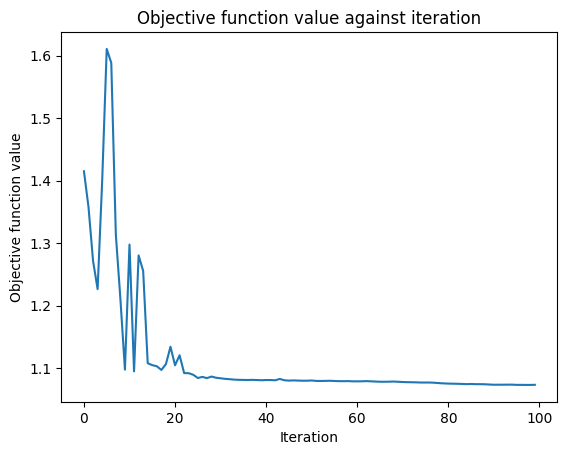

In [ ]:
start = time.time()
vqc.fit(X_train, Y_train)
elapsed = time.time() - start

In [ ]:
preds = vqc.predict(X_test)
score = vqc.score(X_test, Y_test)
precision = precision_score(Y_test, preds, average='weighted')
accuracy = accuracy_score(Y_test, preds)
recall = recall_score(Y_test, preds, average='macro')
f1 = f1_score(Y_test, preds, average='weighted')

In [ ]:
times.append(elapsed)
precisions.append(precision)
accuracies.append(accuracy)
recalls.append(recall)
f1s.append(f1)

In [ ]:
print("Time:\n",times)
print("Precision:\n",precisions)
print("Accuracy:\n",accuracies)
print("Recalls:\n",recalls)
print("F1:\n",f1s)

Time:
 [102.52722954750061]
Precision:
 [0.7333333333333333]
Accuracy:
 [0.6]
Recalls:
 [0.6161616161616161]
F1:
 [0.5471200297287254]


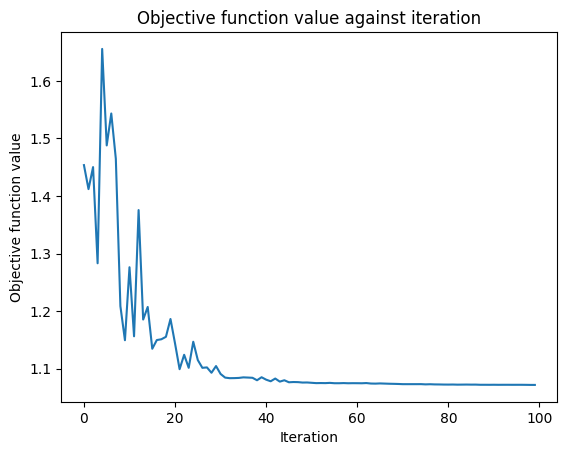

Time:
 [57.90449094772339, 57.17562794685364, 58.40049433708191, 59.21647810935974, 54.070212841033936, 55.1781747341156, 55.66029071807861, 54.82924175262451, 55.38962745666504, 55.03931283950806, 49.01200604438782, 49.06900668144226, 47.65551161766052, 37.13999366760254, 37.13253736495972, 37.59716820716858, 37.805195569992065, 38.78424906730652, 37.776909589767456]
Precision:
 [0.8588235294117648, 0.9033333333333334, 0.9013888888888889, 0.8322344322344323, 0.85, 0.9013888888888889, 0.8774410774410775, 0.9694444444444444, 0.9333333333333333, 0.86875, 0.7247619047619048, 0.6568181818181817, 0.7247619047619048, 0.696031746031746, 0.7247619047619048, 0.675, 0.7247619047619048, 0.7333333333333333, 0.7247619047619048]
Accuracy:
 [0.7333333333333333, 0.9, 0.9, 0.8, 0.7, 0.9, 0.8666666666666667, 0.9666666666666667, 0.9333333333333333, 0.7666666666666667, 0.5666666666666667, 0.5333333333333333, 0.5666666666666667, 0.5333333333333333, 0.5666666666666667, 0.5333333333333333, 0.5666666666666667

In [8]:
for i in range(9):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)

**Precision:**
 [ 0.86875, 0.7247619047619048, 0.6568181818181817, 0.7247619047619048, 0.696031746031746, 0.7247619047619048, 0.675, 0.7247619047619048, 0.7333333333333333, 0.7247619047619048]
**Mean Precision:**
0.7253742784992785±0.05359133289605142

**Accuracy:**
 [ 0.7666666666666667, 0.5666666666666667, 0.5333333333333333, 0.5666666666666667, 0.5333333333333333, 0.5666666666666667, 0.5333333333333333, 0.5666666666666667, 0.6, 0.5666666666666667]
**Mean Accuracy:**
0.58±0.06531972647421809

**Recall:**
 [ 0.787878787878788, 0.5858585858585857, 0.5353535353535354, 0.5858585858585857, 0.5488215488215488, 0.5858585858585857, 0.5420875420875421, 0.5858585858585857, 0.6161616161616161, 0.5858585858585857]
**Mean Recall:**
0.5959595959595958±0.06822648908673945

**F1:**
 [ 0.7448888888888889, 0.4888888888888889, 0.5035531135531136, 0.4888888888888889, 0.45821256038647346, 0.4888888888888889, 0.4835164835164835, 0.4888888888888889, 0.5471200297287254, 0.4888888888888889]
**Mean F1:**
0.5181735520518129±0.07844481509489719

**Time:**
 [55.03931283950806, 49.01200604438782, 49.06900668144226, 47.65551161766052, 37.13999366760254, 37.13253736495972, 37.59716820716858, 37.805195569992065, 38.78424906730652, 37.776909589767456]
**Mean Time:**
42.70118906497955±6.392961965278267



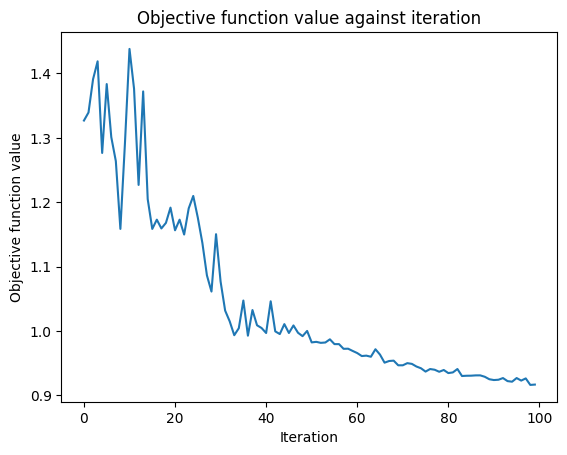

Precision:
 [0.8588235294117648, 0.9033333333333334, 0.9013888888888889, 0.8322344322344323, 0.85, 0.9013888888888889, 0.8774410774410775, 0.9694444444444444, 0.9333333333333333, 0.86875]
Accuracy:
 [0.7333333333333333, 0.9, 0.9, 0.8, 0.7, 0.9, 0.8666666666666667, 0.9666666666666667, 0.9333333333333333, 0.7666666666666667]
Recall:
 [0.7575757575757575, 0.9023569023569024, 0.8956228956228957, 0.8114478114478114, 0.7272727272727272, 0.8956228956228957, 0.872053872053872, 0.9629629629629629, 0.9326599326599326, 0.787878787878788]
F1:
 [0.6981684981684982, 0.9002506265664162, 0.89923273657289, 0.795959595959596, 0.6461538461538462, 0.89923273657289, 0.8666666666666667, 0.9664109121909632, 0.9333333333333333, 0.7448888888888889]
Time:
 [57.90449094772339, 57.17562794685364, 58.40049433708191, 59.21647810935974, 54.070212841033936, 55.1781747341156, 55.66029071807861, 54.82924175262451, 55.38962745666504, 55.03931283950806]


In [7]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.8588235294117648, 0.9033333333333334, 0.9013888888888889, 0.8322344322344323, 0.85, 0.9013888888888889, 0.8774410774410775, 0.9694444444444444, 0.9333333333333333, 0.86875]
**Mean Precision:**
0.8896137927976163±0.03891403281891466

**Accuracy:**
 [0.7333333333333333, 0.9, 0.9, 0.8, 0.7, 0.9, 0.8666666666666667, 0.9666666666666667, 0.9333333333333333, 0.7666666666666667]
**Mean Accuracy:**
0.8466666666666669±0.08589399151150086

**Recall:**
 [0.7575757575757575, 0.9023569023569024, 0.8956228956228957, 0.8114478114478114, 0.7272727272727272, 0.8956228956228957, 0.872053872053872, 0.9629629629629629, 0.9326599326599326, 0.787878787878788]
**Mean Recall:**
0.8545454545454545±0.07465034487651354

**F1:**
 [0.6981684981684982, 0.9002506265664162, 0.89923273657289, 0.795959595959596, 0.6461538461538462, 0.89923273657289, 0.8666666666666667, 0.9664109121909632, 0.9333333333333333, 0.7448888888888889]
**Mean F1:**
0.8350297841073988±0.1022155905750261

**Time:**
 [57.90449094772339, 57.17562794685364, 58.40049433708191, 59.21647810935974, 54.070212841033936, 55.1781747341156, 55.66029071807861, 54.82924175262451, 55.38962745666504, 55.03931283950806]
**Mean Time:**
56.286395168304445±1.6576518447497914


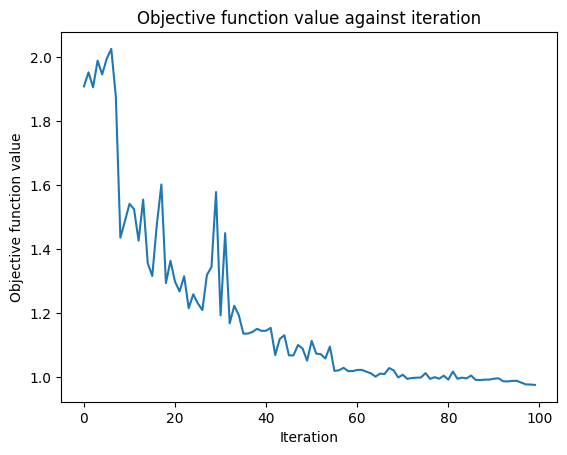

Precision:
 [0.85, 0.85, 0.8588235294117648, 0.9700000000000001, 0.9454545454545454, 0.7567765567765569, 0.9700000000000001, 1.0, 0.9700000000000001, 0.88]
Accuracy:
 [0.7, 0.7, 0.7333333333333333, 0.9666666666666667, 0.9333333333333333, 0.7333333333333333, 0.9666666666666667, 1.0, 0.9666666666666667, 0.8]
Recall:
 [0.7272727272727272, 0.7272727272727272, 0.7575757575757575, 0.9696969696969697, 0.9393939393939394, 0.744107744107744, 0.9696969696969697, 1.0, 0.9696969696969697, 0.8181818181818182]
F1:
 [0.6461538461538462, 0.6461538461538462, 0.6981684981684982, 0.966750208855472, 0.9333333333333333, 0.7279461279461279, 0.966750208855472, 1.0, 0.966750208855472, 0.7875]
Time:
 [72.78836679458618, 69.05397009849548, 65.53322720527649, 63.33870029449463, 63.316572427749634, 64.73917698860168, 65.72093915939331, 67.66286945343018, 66.03567743301392, 65.73150086402893]


In [6]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.85, 0.85, 0.8588235294117648, 0.9700000000000001, 0.9454545454545454, 0.7567765567765569, 0.9700000000000001, 1.0, 0.9700000000000001, 0.88]
**Mean Precision:**
0.9051054631642869±0.07356216050398678

**Accuracy:**
 [0.7, 0.7, 0.7333333333333333, 0.9666666666666667, 0.9333333333333333, 0.7333333333333333, 0.9666666666666667, 1.0, 0.9666666666666667, 0.8]
**Mean Accuracy:**
0.85±0.12041594578792299

**Recall:**
 [0.7272727272727272, 0.7272727272727272, 0.7575757575757575, 0.9696969696969697, 0.9393939393939394, 0.744107744107744, 0.9696969696969697, 1.0, 0.9696969696969697, 0.8181818181818182]
**Mean Recall:**
0.8622895622895623±0.110839889360103

**F1:**
 [0.6461538461538462, 0.6461538461538462, 0.6981684981684982, 0.966750208855472, 0.9333333333333333, 0.7279461279461279, 0.966750208855472, 1.0, 0.966750208855472, 0.7875]
**Mean F1:**
0.8339506278322067±0.1388247695065697

**Time:**
 [72.78836679458618, 69.05397009849548, 65.53322720527649, 63.33870029449463, 63.316572427749634, 64.73917698860168, 65.72093915939331, 67.66286945343018, 66.03567743301392, 65.73150086402893]
**Mean Time:**
66.39210007190704±2.6996010453325625


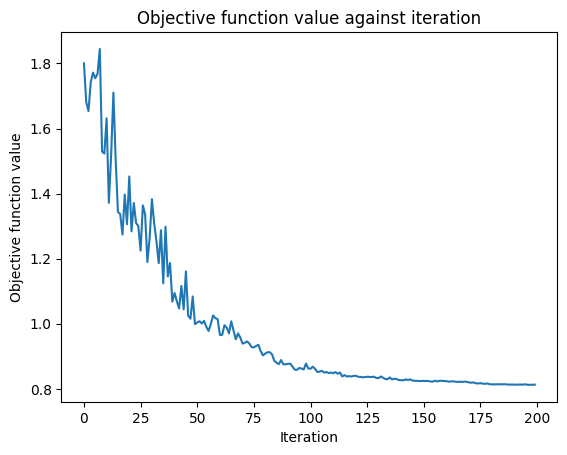

Precision:
 [0.9700000000000001, 0.9700000000000001, 0.925, 0.8666666666666667, 0.8928571428571428, 0.8663636363636364, 0.9700000000000001, 0.925, 0.9700000000000001, 0.9700000000000001]
Accuracy:
 [0.9666666666666667, 0.9666666666666667, 0.9, 0.8666666666666667, 0.8333333333333334, 0.8666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9666666666666667]
Recall:
 [0.9696969696969697, 0.9696969696969697, 0.9090909090909092, 0.8653198653198654, 0.8484848484848485, 0.8653198653198654, 0.9696969696969697, 0.9090909090909092, 0.9696969696969697, 0.9696969696969697]
F1:
 [0.966750208855472, 0.966750208855472, 0.899248120300752, 0.8666666666666667, 0.8269394714407502, 0.8650793650793652, 0.966750208855472, 0.899248120300752, 0.966750208855472, 0.966750208855472]
Time:
 [115.53657341003418, 111.3443374633789, 104.66907334327698, 121.36061358451843, 93.08284068107605, 97.17082905769348, 83.63749241828918, 80.83201885223389, 79.68577527999878, 85.12932181358337]


In [5]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 200
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9700000000000001, 0.9700000000000001, 0.925, 0.8666666666666667, 0.8928571428571428, 0.8663636363636364, 0.9700000000000001, 0.925, 0.9700000000000001, 0.9700000000000001]
**Mean Precision:**
0.9325887445887447±0.04174119516646329

**Accuracy:**
 [0.9666666666666667, 0.9666666666666667, 0.9, 0.8666666666666667, 0.8333333333333334, 0.8666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9666666666666667]
**Mean Accuracy:**
0.9200000000000002±0.04988876515698587

**Recall:**
 [0.9696969696969697, 0.9696969696969697, 0.9090909090909092, 0.8653198653198654, 0.8484848484848485, 0.8653198653198654, 0.9696969696969697, 0.9090909090909092, 0.9696969696969697, 0.9696969696969697]
**Mean Recall:**
0.9245791245791246±0.048447422891865176

**F1:**
 [0.966750208855472, 0.966750208855472, 0.899248120300752, 0.8666666666666667, 0.8269394714407502, 0.8650793650793652, 0.966750208855472, 0.899248120300752, 0.966750208855472, 0.966750208855472]
**Mean F1:**
0.9190932788065647±0.051285429011841355

**Time:**
 [115.53657341003418, 111.3443374633789, 104.66907334327698, 121.36061358451843, 93.08284068107605, 97.17082905769348, 83.63749241828918, 80.83201885223389, 79.68577527999878, 85.12932181358337]
**Mean Time:**
97.24488759040833±14.48118770374537



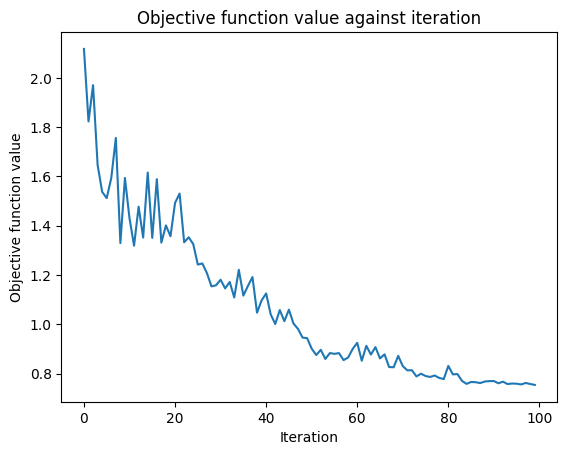

Precision:
 [0.9333333333333333, 0.9013888888888889, 0.9333333333333333, 1.0, 0.9694444444444444, 0.9435897435897436, 0.9700000000000001, 1.0, 0.9435897435897436, 0.9700000000000001]
Accuracy:
 [0.9333333333333333, 0.9, 0.9333333333333333, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667]
Recall:
 [0.9326599326599326, 0.8956228956228957, 0.9326599326599326, 1.0, 0.9629629629629629, 0.9259259259259259, 0.9696969696969697, 1.0, 0.9259259259259259, 0.9696969696969697]
F1:
 [0.9333333333333333, 0.89923273657289, 0.9333333333333333, 1.0, 0.9664109121909632, 0.9319444444444444, 0.966750208855472, 1.0, 0.9319444444444444, 0.966750208855472]
Time:
 [112.95809960365295, 86.65127062797546, 86.56477546691895, 87.52384281158447, 90.27053260803223, 88.04674291610718, 89.25624132156372, 88.50006628036499, 88.85365986824036, 88.59521627426147]


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=2, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9333333333333333, 0.9013888888888889, 0.9333333333333333, 1.0, 0.9694444444444444, 0.9435897435897436, 0.9700000000000001, 1.0, 0.9435897435897436, 0.9700000000000001]
**Mean Precision:**
0.9564679487179488±0.02959817775991582

**Accuracy:**
 [0.9333333333333333, 0.9, 0.9333333333333333, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667]
**Mean Accuracy:**
0.9533333333333334±0.030550504633038926


**Recall:**
 [0.9326599326599326, 0.8956228956228957, 0.9326599326599326, 1.0, 0.9629629629629629, 0.9259259259259259, 0.9696969696969697, 1.0, 0.9259259259259259, 0.9696969696969697]
**Mean Recall:**
0.9515151515151515±0.032616514581312685

**F1:**
 [0.9333333333333333, 0.89923273657289, 0.9333333333333333, 1.0, 0.9664109121909632, 0.9319444444444444, 0.966750208855472, 1.0, 0.9319444444444444, 0.966750208855472]
**Mean F1:**
0.9529699622030353±0.03086604451778918

**Time:**
 [112.95809960365295, 86.65127062797546, 86.56477546691895, 87.52384281158447, 90.27053260803223, 88.04674291610718, 89.25624132156372, 88.50006628036499, 88.85365986824036, 88.59521627426147]
**Mean Time:**
90.72204477787018±7.489898887814532


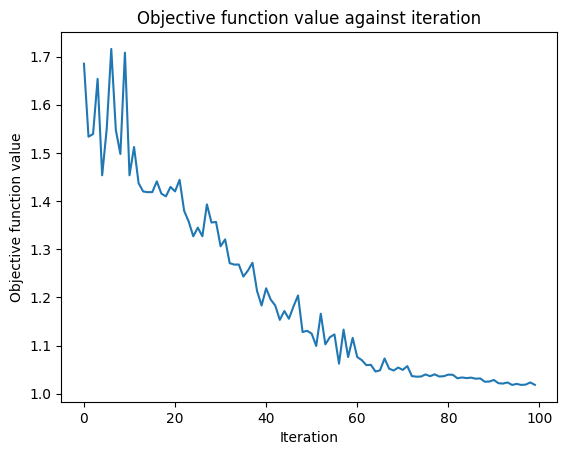

Precision:
 [0.8854166666666666, 0.535, 0.9033333333333334, 0.9700000000000001, 0.8774410774410775, 0.8574074074074074, 0.925, 0.8705882352941177, 0.9022222222222223, 0.8928571428571428]
Accuracy:
 [0.8333333333333334, 0.7, 0.9, 0.9666666666666667, 0.8666666666666667, 0.7666666666666667, 0.9, 0.8, 0.8666666666666667, 0.8333333333333334]
Recall:
 [0.8148148148148149, 0.6666666666666666, 0.9023569023569024, 0.9696969696969697, 0.872053872053872, 0.7407407407407408, 0.9090909090909092, 0.7777777777777777, 0.8518518518518517, 0.8484848484848485]
F1:
 [0.8167141500474833, 0.5935483870967742, 0.9002506265664162, 0.966750208855472, 0.8666666666666667, 0.7205851619644723, 0.899248120300752, 0.7714285714285716, 0.8578754578754579, 0.8269394714407502]
Time:
 [89.82118368148804, 84.63882684707642, 84.84853863716125, 83.68179035186768, 83.43823909759521, 84.25380849838257, 83.43092083930969, 85.33874559402466, 85.95195984840393, 82.51994848251343]


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=2, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=2)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.8854166666666666, 0.535, 0.9033333333333334, 0.9700000000000001, 0.8774410774410775, 0.8574074074074074, 0.925, 0.8705882352941177, 0.9022222222222223, 0.8928571428571428]
**Mean Precision:**
0.8619266085221968±0.11301415745368455

**Accuracy:**
 [0.8333333333333334, 0.7, 0.9, 0.9666666666666667, 0.8666666666666667, 0.7666666666666667, 0.9, 0.8, 0.8666666666666667, 0.8333333333333334]
**Mean Accuracy:**
0.8433333333333334±0.07156970184527964

**Recall:**
 [0.8148148148148149, 0.6666666666666666, 0.9023569023569024, 0.9696969696969697, 0.872053872053872, 0.7407407407407408, 0.9090909090909092, 0.7777777777777777, 0.8518518518518517, 0.8484848484848485]
**Mean Recall:**
0.8353535353535353±0.08420807434327471

**F1:**
 [0.8167141500474833, 0.5935483870967742, 0.9002506265664162, 0.966750208855472, 0.8666666666666667, 0.7205851619644723, 0.899248120300752, 0.7714285714285716, 0.8578754578754579, 0.8269394714407502]
**Mean F1:**
0.8220006822242818±0.1007025977735514


**Time:**
 [89.82118368148804, 84.63882684707642, 84.84853863716125, 83.68179035186768, 83.43823909759521, 84.25380849838257, 83.43092083930969, 85.33874559402466, 85.95195984840393, 82.51994848251343]
**Mean Time:**
84.79239618778229±1.9321858573941286

# **ZFeatureMap/PauliTwoDesign**

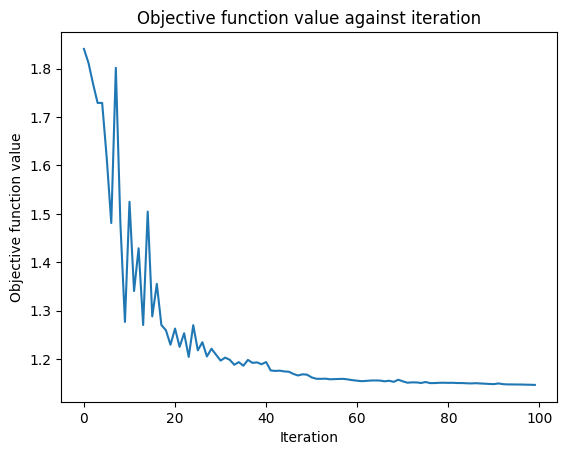

Precision:
 [1.0, 0.8421052631578948, 0.7463636363636363, 0.939141414141414, 0.9022222222222223, 0.8774410774410775, 0.9435897435897436, 0.5263157894736842, 0.5, 0.535]
Accuracy:
 [1.0, 0.7, 0.7, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 0.9333333333333333, 0.6666666666666666, 0.5, 0.7]
Recall:
 [1.0, 0.6868686868686869, 0.7138047138047138, 0.9259259259259259, 0.8518518518518517, 0.872053872053872, 0.9259259259259259, 0.6363636363636364, 0.4868686868686869, 0.6666666666666666]
F1:
 [1.0, 0.6886569872958258, 0.6834023464458246, 0.9306849551414769, 0.8578754578754579, 0.8666666666666667, 0.9319444444444444, 0.5777777777777777, 0.4915294117647059, 0.5935483870967742]
Time:
 [76.66983199119568, 77.07742500305176, 76.46723103523254, 77.62075161933899, 78.93351030349731, 75.15892720222473, 78.62873911857605, 77.40309309959412, 79.26708316802979, 78.27139806747437]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=2, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=1)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [1.0, 0.8421052631578948, 0.7463636363636363, 0.939141414141414, 0.9022222222222223, 0.8774410774410775, 0.9435897435897436, 0.5263157894736842, 0.5, 0.535]

**Accuracy:**
 [1.0, 0.7, 0.7, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 0.9333333333333333, 0.6666666666666666, 0.5, 0.7]

**Recall:**
 [1.0, 0.6868686868686869, 0.7138047138047138, 0.9259259259259259, 0.8518518518518517, 0.872053872053872, 0.9259259259259259, 0.6363636363636364, 0.4868686868686869, 0.6666666666666666]

**F1:**
 [1.0, 0.6886569872958258, 0.6834023464458246, 0.9306849551414769, 0.8578754578754579, 0.8666666666666667, 0.9319444444444444, 0.5777777777777777, 0.4915294117647059, 0.5935483870967742]
 
**Time:**
 [76.66983199119568, 77.07742500305176, 76.46723103523254, 77.62075161933899, 78.93351030349731, 75.15892720222473, 78.62873911857605, 77.40309309959412, 79.26708316802979, 78.27139806747437]


**Precision Mean:** 0.7812179146389673±0.18239378916530422
**Accuracy:** 0.7866666666666666±0.14847371634213394
**Recall:** 0.7766329966329966±0.15393799469716477
**F1:** 0.7622086434508955±0.16767570137290067
**Time:** 77.54979906082153±1.2025305091998486

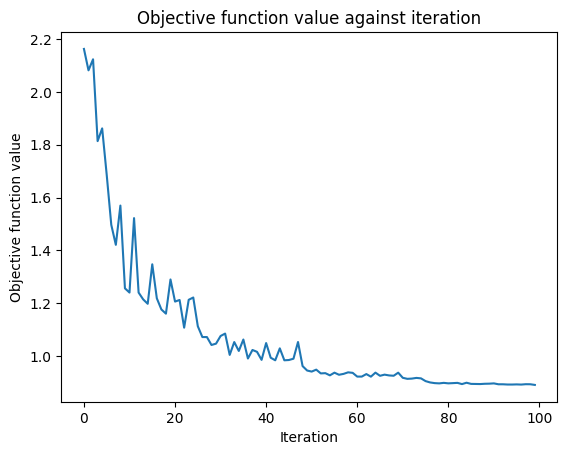

Precision:
 [1.0, 0.8366666666666667, 0.9700000000000001, 0.9214285714285714, 0.8725274725274725, 0.9694444444444444, 0.9022222222222223, 0.9700000000000001, 0.9700000000000001, 0.8854166666666666]
Accuracy:
 [1.0, 0.8333333333333334, 0.9666666666666667, 0.9, 0.8666666666666667, 0.9666666666666667, 0.8666666666666667, 0.9666666666666667, 0.9666666666666667, 0.8333333333333334]
Recall:
 [1.0, 0.8350168350168351, 0.9696969696969697, 0.8888888888888888, 0.8585858585858586, 0.9629629629629629, 0.8518518518518517, 0.9696969696969697, 0.9696969696969697, 0.8148148148148149]
F1:
 [1.0, 0.8337510442773599, 0.966750208855472, 0.896, 0.8638888888888888, 0.9664109121909632, 0.8578754578754579, 0.966750208855472, 0.966750208855472, 0.8167141500474833]
Time:
 [85.81473755836487, 88.65452861785889, 86.24362587928772, 85.58829593658447, 85.6298451423645, 84.4047920703888, 85.59573864936829, 84.33167695999146, 85.71385216712952, 85.62778520584106]


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=2, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=2)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [1.0, 0.8366666666666667, 0.9700000000000001, 0.9214285714285714, 0.8725274725274725, 0.9694444444444444, 0.9022222222222223, 0.9700000000000001, 0.9700000000000001, 0.8854166666666666]

**Accuracy:**
 [1.0, 0.8333333333333334, 0.9666666666666667, 0.9, 0.8666666666666667, 0.9666666666666667, 0.8666666666666667, 0.9666666666666667, 0.9666666666666667, 0.8333333333333334]

**Recall:**
 [1.0, 0.8350168350168351, 0.9696969696969697, 0.8888888888888888, 0.8585858585858586, 0.9629629629629629, 0.8518518518518517, 0.9696969696969697, 0.9696969696969697, 0.8148148148148149]

**F1:**
 [1.0, 0.8337510442773599, 0.966750208855472, 0.896, 0.8638888888888888, 0.9664109121909632, 0.8578754578754579, 0.966750208855472, 0.966750208855472, 0.8167141500474833]

**Time:**
 [85.81473755836487, 88.65452861785889, 86.24362587928772, 85.58829593658447, 85.6298451423645, 84.4047920703888, 85.59573864936829, 84.33167695999146, 85.71385216712952, 85.62778520584106]

**Precision Mean:** 0.9297706043956044±0.051090398742255946
**Accuracy Mean:** 0.9166666666666667±0.060092521257733136
**Recall Mean:** 0.9121212121212121±0.06534849592957415
**F1 Mean:** 0.913489107984657±0.06354334457211132
**Time Mean:** 85.76048781871796±1.121824126518501


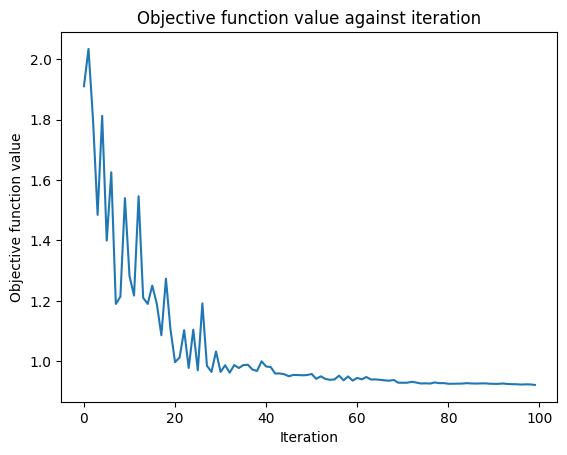

Precision:
 [1.0, 0.9013888888888889, 0.9700000000000001, 0.9700000000000001, 1.0, 0.9435897435897436, 0.9333333333333333, 0.9700000000000001, 0.9022222222222223, 0.9700000000000001]
Accuracy:
 [1.0, 0.9, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.8666666666666667, 0.9666666666666667]
Recall:
 [1.0, 0.8956228956228957, 0.9696969696969697, 0.9696969696969697, 1.0, 0.9259259259259259, 0.9326599326599326, 0.9696969696969697, 0.8518518518518517, 0.9696969696969697]
F1:
 [1.0, 0.89923273657289, 0.966750208855472, 0.966750208855472, 1.0, 0.9319444444444444, 0.9333333333333333, 0.966750208855472, 0.8578754578754579, 0.966750208855472]
Time:
 [99.47640752792358, 91.36446714401245, 94.27501463890076, 91.71973514556885, 92.59277009963989, 92.56493854522705, 90.96981954574585, 94.54133677482605, 92.23439931869507, 89.1767406463623]


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=2, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [1.0, 0.9013888888888889, 0.9700000000000001, 0.9700000000000001, 1.0, 0.9435897435897436, 0.9333333333333333, 0.9700000000000001, 0.9022222222222223, 0.9700000000000001]

**Accuracy:**
 [1.0, 0.9, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.8666666666666667, 0.9666666666666667]

**Recall:**
 [1.0, 0.8956228956228957, 0.9696969696969697, 0.9696969696969697, 1.0, 0.9259259259259259, 0.9326599326599326, 0.9696969696969697, 0.8518518518518517, 0.9696969696969697]

**F1:**
 [1.0, 0.89923273657289, 0.966750208855472, 0.966750208855472, 1.0, 0.9319444444444444, 0.9333333333333333, 0.966750208855472, 0.8578754578754579, 0.966750208855472]

**Time:**
 [99.47640752792358, 91.36446714401245, 94.27501463890076, 91.71973514556885, 92.59277009963989, 92.56493854522705, 90.96981954574585, 94.54133677482605, 92.23439931869507, 89.1767406463623]

**Precision Mean:** 0.956053418803419±0.03346369158620531
**Accuracy Mean:**0.95±0.04013864859597431
**Recall Mean:** 0.9484848484848485±0.044720345552182565
**F1 Mean:** 0.9489386807648014±0.04216520029995036
**Time Mean:** 92.89156293869019±2.6423833850303353
 


# **ZFeatureMap TwoLocal**

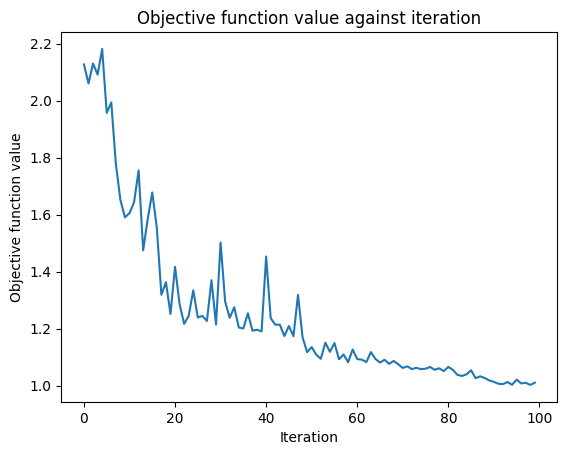

Precision:
 [0.9333333333333333, 0.9033333333333334, 0.9454545454545454, 0.9694444444444444, 0.9700000000000001, 0.9333333333333333, 1.0, 0.8452380952380952, 0.9013888888888889, 0.8928571428571428]
Accuracy:
 [0.9333333333333333, 0.9, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0, 0.8333333333333334, 0.9, 0.8333333333333334]
Recall:
 [0.9326599326599326, 0.9023569023569024, 0.9393939393939394, 0.9629629629629629, 0.9696969696969697, 0.9326599326599326, 1.0, 0.8215488215488215, 0.8956228956228957, 0.8484848484848485]
F1:
 [0.9333333333333333, 0.9002506265664162, 0.9333333333333333, 0.9664109121909632, 0.966750208855472, 0.9333333333333333, 1.0, 0.8266666666666667, 0.89923273657289, 0.8269394714407502]
Time:
 [88.9853663444519, 81.84184694290161, 81.47856020927429, 79.97899556159973, 79.79610323905945, 79.7976758480072, 79.14443182945251, 79.71567487716675, 79.47693848609924, 80.20739960670471]


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=1, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9333333333333333, 0.9033333333333334, 0.9454545454545454, 0.9694444444444444, 0.9700000000000001, 0.9333333333333333, 1.0, 0.8452380952380952, 0.9013888888888889, 0.8928571428571428]
**Mean Precision:**
0.9294383116883116±0.04290414150532463

**Accuracy:**
 [0.9333333333333333, 0.9, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0, 0.8333333333333334, 0.9, 0.8333333333333334]
**Mean Precision:**
 0.9200000000000002±0.052068331172711015

**Recall:**
 [0.9326599326599326, 0.9023569023569024, 0.9393939393939394, 0.9629629629629629, 0.9696969696969697, 0.9326599326599326, 1.0, 0.8215488215488215, 0.8956228956228957, 0.8484848484848485]
**Mean Precision:**
0.9205387205387204±0.05207873751107154

**F1:**
 [0.9333333333333333, 0.9002506265664162, 0.9333333333333333, 0.9664109121909632, 0.966750208855472, 0.9333333333333333, 1.0, 0.8266666666666667, 0.89923273657289, 0.8269394714407502]
**Mean Precision:**
0.9186250622293158±0.0542647893768478
 
**Time:**
 [88.9853663444519, 81.84184694290161, 81.47856020927429, 79.97899556159973, 79.79610323905945, 79.7976758480072, 79.14443182945251, 79.71567487716675, 79.47693848609924, 80.20739960670471]
**Mean Precision:**
81.04229929447175±2.768824052862858


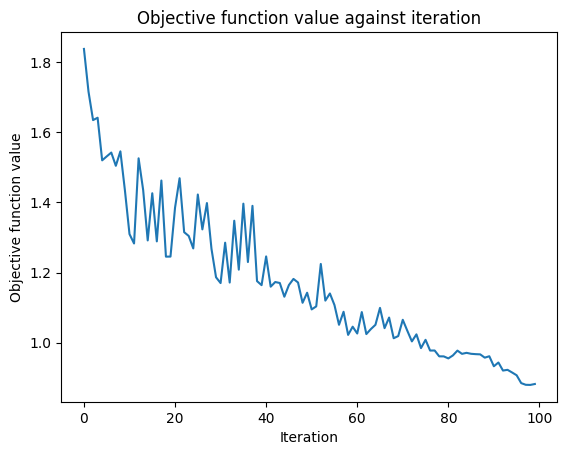

Precision:
 [0.9435897435897436, 0.925, 0.9333333333333333, 0.9694444444444444, 0.8421052631578948, 0.9333333333333333, 0.9694444444444444, 0.9214285714285714, 0.9700000000000001, 0.9694444444444444]
Accuracy:
 [0.9333333333333333, 0.9, 0.9333333333333333, 0.9666666666666667, 0.6666666666666666, 0.9333333333333333, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9666666666666667]
Recall:
 [0.9259259259259259, 0.9090909090909092, 0.9326599326599326, 0.9629629629629629, 0.6969696969696969, 0.9326599326599326, 0.9629629629629629, 0.8888888888888888, 0.9696969696969697, 0.9629629629629629]
F1:
 [0.9319444444444444, 0.899248120300752, 0.9333333333333333, 0.9664109121909632, 0.5873015873015873, 0.9333333333333333, 0.9664109121909632, 0.896, 0.966750208855472, 0.9664109121909632]
Time:
 [122.86625266075134, 97.88079977035522, 98.99889326095581, 98.99697923660278, 97.02453255653381, 95.77400517463684, 95.66808676719666, 96.12730598449707, 96.8599956035614, 97.91512656211853]


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9435897435897436, 0.925, 0.9333333333333333, 0.9694444444444444, 0.8421052631578948, 0.9333333333333333, 0.9694444444444444, 0.9214285714285714, 0.9700000000000001, 0.9694444444444444]
**Mean Precision:**
0.937712357817621±0.03701843522743449

**Accuracy:**
 [0.9333333333333333, 0.9, 0.9333333333333333, 0.9666666666666667, 0.6666666666666666, 0.9333333333333333, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9666666666666667]
**Mean Accuracy:**
0.9133333333333333±0.08589399151150084

**Recall:**
 [0.9259259259259259, 0.9090909090909092, 0.9326599326599326, 0.9629629629629629, 0.6969696969696969, 0.9326599326599326, 0.9629629629629629, 0.8888888888888888, 0.9696969696969697, 0.9629629629629629]
**Mean Recall:**
0.9144781144781146±0.076738135966657

**F1:**
 [0.9319444444444444, 0.899248120300752, 0.9333333333333333, 0.9664109121909632, 0.5873015873015873, 0.9333333333333333, 0.9664109121909632, 0.896, 0.966750208855472, 0.9664109121909632]
**Mean F1:**
0.9047143764141812±0.1088595871234528

**Time:**
 [122.86625266075134, 97.88079977035522, 98.99889326095581, 98.99697923660278, 97.02453255653381, 95.77400517463684, 95.66808676719666, 96.12730598449707, 96.8599956035614, 97.91512656211853]
**Mean Time:**
99.81119775772095±7.769751074992838


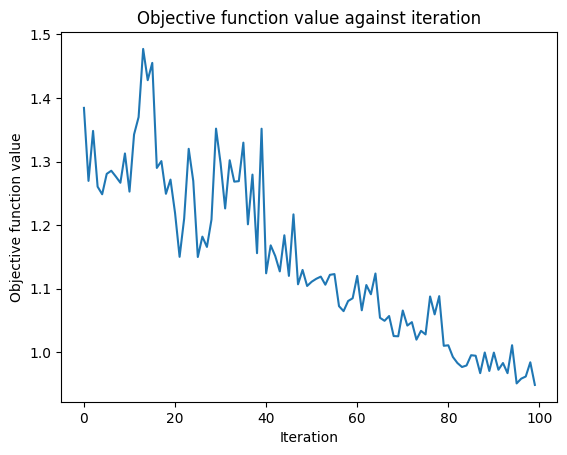

Precision:
 [0.9076923076923077, 0.9694444444444444, 0.9454545454545454, 0.8928571428571428, 0.9022222222222223, 0.8574074074074074, 0.9694444444444444, 0.9214285714285714, 0.8928571428571428, 0.9333333333333333]
Accuracy:
 [0.8666666666666667, 0.9666666666666667, 0.9333333333333333, 0.8333333333333334, 0.8666666666666667, 0.7666666666666667, 0.9666666666666667, 0.9, 0.8333333333333334, 0.9333333333333333]
Recall:
 [0.8787878787878788, 0.9629629629629629, 0.9393939393939394, 0.8484848484848485, 0.8518518518518517, 0.7407407407407408, 0.9629629629629629, 0.8888888888888888, 0.8484848484848485, 0.9326599326599326]
F1:
 [0.863973063973064, 0.9664109121909632, 0.9333333333333333, 0.8269394714407502, 0.8578754578754579, 0.7205851619644723, 0.9664109121909632, 0.896, 0.8269394714407502, 0.9333333333333333]
Time:
 [110.91838312149048, 110.37791275978088, 108.77001476287842, 110.44505214691162, 109.4286756515503, 109.76114392280579, 111.43807792663574, 110.88872361183167, 110.32440280914307, 1

In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 100
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9076923076923077, 0.9694444444444444, 0.9454545454545454, 0.8928571428571428, 0.9022222222222223, 0.8574074074074074, 0.9694444444444444, 0.9214285714285714, 0.8928571428571428, 0.9333333333333333]
**Mean Precision:**
0.9192141562141561±0.03401457607343961

**Accuracy:**
 [0.8666666666666667, 0.9666666666666667, 0.9333333333333333, 0.8333333333333334, 0.8666666666666667, 0.7666666666666667, 0.9666666666666667, 0.9, 0.8333333333333334, 0.9333333333333333]
**Mean Accuracy:**
0.8866666666666665±0.061824123303304675

**Recall:**
 [0.8787878787878788, 0.9629629629629629, 0.9393939393939394, 0.8484848484848485, 0.8518518518518517, 0.7407407407407408, 0.9629629629629629, 0.8888888888888888, 0.8484848484848485, 0.9326599326599326]
**Mean Recall:**
0.8855218855218856±0.06481809428058255

**F1:**
 [0.863973063973064, 0.9664109121909632, 0.9333333333333333, 0.8269394714407502, 0.8578754578754579, 0.7205851619644723, 0.9664109121909632, 0.896, 0.8269394714407502, 0.9333333333333333]
**Mean F1:**
0.8791801117743088±0.07256868899443542

**Time:**
 [110.91838312149048, 110.37791275978088, 108.77001476287842, 110.44505214691162, 109.4286756515503, 109.76114392280579, 111.43807792663574, 110.88872361183167, 110.32440280914307, 108.96850562095642]
**Mean Time:**
110.13208923339843±0.8326634618908281


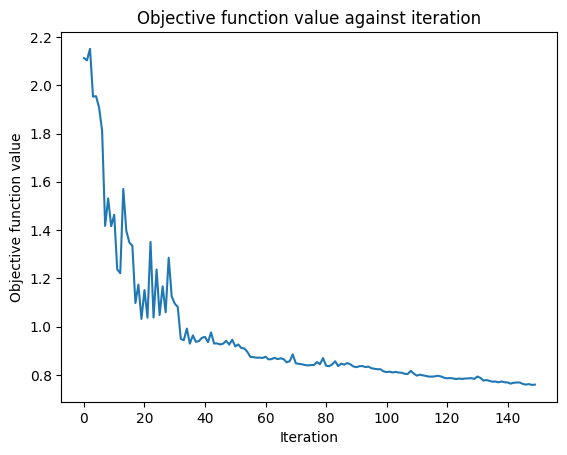

Precision:
 [0.9333333333333333, 0.9435897435897436, 0.9694444444444444, 0.8574074074074074, 0.8588235294117648, 0.9333333333333333, 0.9694444444444444, 0.9694444444444444, 0.8705882352941177, 1.0]
Accuracy:
 [0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.7666666666666667, 0.7333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.8, 1.0]
Recall:
 [0.9326599326599326, 0.9259259259259259, 0.9629629629629629, 0.7407407407407408, 0.7575757575757575, 0.9326599326599326, 0.9629629629629629, 0.9629629629629629, 0.7777777777777777, 1.0]
F1:
 [0.9333333333333333, 0.9319444444444444, 0.9664109121909632, 0.7205851619644723, 0.6981684981684982, 0.9333333333333333, 0.9664109121909632, 0.9664109121909632, 0.7714285714285716, 1.0]
Time:
 [160.04528784751892, 118.01081585884094, 119.07460570335388, 118.9204454421997, 118.09772515296936, 122.71494126319885, 118.32548928260803, 116.92024421691895, 117.26903200149536, 118.53894138336182]


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 150
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=1, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9333333333333333, 0.9435897435897436, 0.9694444444444444, 0.8574074074074074, 0.8588235294117648, 0.9333333333333333, 0.9694444444444444, 0.9694444444444444, 0.8705882352941177, 1.0]
**Mean Precision:**
0.9305408915703033±0.048618003413263194

**Accuracy:**
 [0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.7666666666666667, 0.7333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.8, 1.0]
**Mean Accuracy:**
0.9±0.09067647005823629

**Recall:**
 [0.9326599326599326, 0.9259259259259259, 0.9629629629629629, 0.7407407407407408, 0.7575757575757575, 0.9326599326599326, 0.9629629629629629, 0.9629629629629629, 0.7777777777777777, 1.0]
**Mean Recall:**
0.8956228956228955±0.0922460610653

**F1:**
 [0.9333333333333333, 0.9319444444444444, 0.9664109121909632, 0.7205851619644723, 0.6981684981684982, 0.9333333333333333, 0.9664109121909632, 0.9664109121909632, 0.7714285714285716, 1.0]
**Mean F1:**
0.8888026079245541±0.1070870361519327

**Time:**
 [160.04528784751892, 118.01081585884094, 119.07460570335388, 118.9204454421997, 118.09772515296936, 122.71494126319885, 118.32548928260803, 116.92024421691895, 117.26903200149536, 118.53894138336182]
**Mean Time:**
122.79175281524658±12.508142160783517


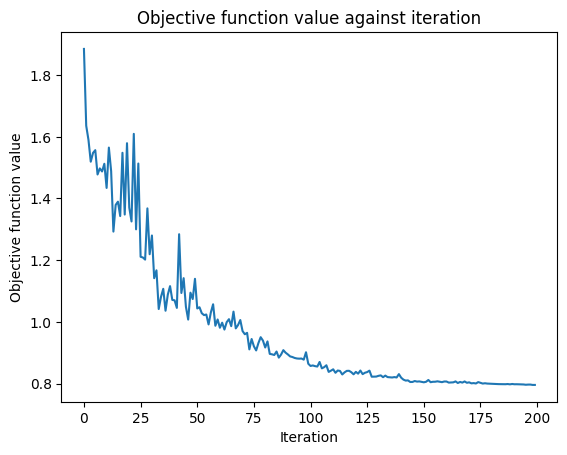

Precision:
 [0.9333333333333333, 0.9700000000000001, 1.0, 0.9033333333333334, 0.9700000000000001, 0.9694444444444444, 1.0, 0.9694444444444444, 0.9694444444444444, 0.9700000000000001]
Accuracy:
 [0.9333333333333333, 0.9666666666666667, 1.0, 0.9, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
Recall:
 [0.9326599326599326, 0.9696969696969697, 1.0, 0.9023569023569024, 0.9696969696969697, 0.9629629629629629, 1.0, 0.9629629629629629, 0.9629629629629629, 0.9696969696969697]
F1:
 [0.9333333333333333, 0.966750208855472, 1.0, 0.9002506265664162, 0.966750208855472, 0.9664109121909632, 1.0, 0.9664109121909632, 0.9664109121909632, 0.966750208855472]
Time:
 [185.8080289363861, 187.25621461868286, 187.96767210960388, 184.8379683494568, 185.50432085990906, 189.18269991874695, 188.16402530670166, 190.22841143608093, 190.4100410938263, 186.53784823417664]


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 200
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9333333333333333, 0.9700000000000001, 1.0, 0.9033333333333334, 0.9700000000000001, 0.9694444444444444, 1.0, 0.9694444444444444, 0.9694444444444444, 0.9700000000000001]
**Mean Precision:**
0.9655000000000001±0.02717961518273355

**Accuracy:**
 [0.9333333333333333, 0.9666666666666667, 1.0, 0.9, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
**Mean Accuracy:**
0.9633333333333333±0.02768874620972691

**Recall:**
 [0.9326599326599326, 0.9696969696969697, 1.0, 0.9023569023569024, 0.9696969696969697, 0.9629629629629629, 1.0, 0.9629629629629629, 0.9629629629629629, 0.9696969696969697]
**Mean Recall:**
0.9632996632996633±0.0273308604357989

**F1:**
 [0.9333333333333333, 0.966750208855472, 1.0, 0.9002506265664162, 0.966750208855472, 0.9664109121909632, 1.0, 0.9664109121909632, 0.9664109121909632, 0.966750208855472]
**Mean F1:**
0.9633067323039055±0.027625620890141526

**Time:**
 [185.8080289363861, 187.25621461868286, 187.96767210960388, 184.8379683494568, 185.50432085990906, 189.18269991874695, 188.16402530670166, 190.22841143608093, 190.4100410938263, 186.53784823417664]
**Mean Time:**
187.5897230863571±1.8504127320154462

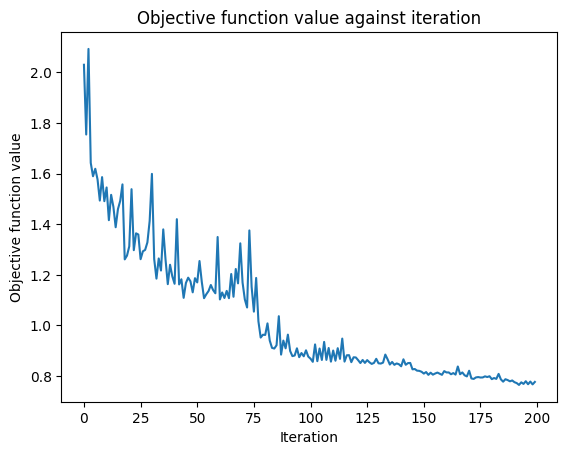

Precision:
 [1.0, 0.9333333333333333, 1.0, 1.0, 0.9700000000000001, 0.9333333333333333, 0.9694444444444444, 0.9694444444444444, 0.9694444444444444, 0.9694444444444444]
Accuracy:
 [1.0, 0.9333333333333333, 1.0, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
Recall:
 [1.0, 0.9326599326599326, 1.0, 1.0, 0.9696969696969697, 0.9326599326599326, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629]
F1:
 [1.0, 0.9333333333333333, 1.0, 1.0, 0.966750208855472, 0.9333333333333333, 0.9664109121909632, 0.9664109121909632, 0.9664109121909632, 0.9664109121909632]
Time:
 [218.0268156528473, 220.472909450531, 222.87066888809204, 221.87125706672668, 223.41074109077454, 220.5955777168274, 217.5485873222351, 220.2281460762024, 219.85833597183228, 215.56779861450195]


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 200
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [1.0, 0.9333333333333333, 1.0, 1.0, 0.9700000000000001, 0.9333333333333333, 0.9694444444444444, 0.9694444444444444, 0.9694444444444444, 0.9694444444444444]
**Mean Precision:**
0.9714444444444446±0.023171662131274178

**Accuracy:**
 [1.0, 0.9333333333333333, 1.0, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
**Mean Accuracy:**
0.97±0.023333333333333327

**Recall:**
 [1.0, 0.9326599326599326, 1.0, 1.0, 0.9696969696969697, 0.9326599326599326, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629]
**Mean Recall:**
0.9686868686868687±0.02381068984274364

**F1:**
 [1.0, 0.9333333333333333, 1.0, 1.0, 0.966750208855472, 0.9333333333333333, 0.9664109121909632, 0.9664109121909632, 0.9664109121909632, 0.9664109121909632]
**Mean F1:**
0.969906052428599±0.023347136816136847

**Time:**
 [218.0268156528473, 220.472909450531, 222.87066888809204, 221.87125706672668, 223.41074109077454, 220.5955777168274, 217.5485873222351, 220.2281460762024, 219.85833597183228, 215.56779861450195]
**Mean Time:**
220.04508378505707±2.314150759710636


# **PauliFeatureMap**

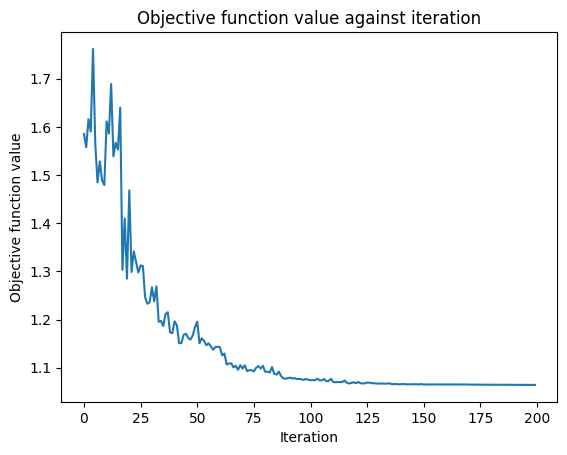

Precision:
 [0.8086531986531985, 0.925, 0.9085858585858586, 0.8322344322344323, 0.833076923076923, 0.8086111111111111, 0.8185185185185185, 0.8366666666666667, 0.812012987012987, 0.7465201465201464]
Accuracy:
 [0.8, 0.9, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8333333333333334, 0.8, 0.7333333333333333]
Recall:
 [0.8016835016835017, 0.9090909090909092, 0.8956228956228957, 0.8114478114478114, 0.8047138047138046, 0.8047138047138046, 0.8084175084175084, 0.8350168350168351, 0.8151515151515151, 0.7478114478114478]
F1:
 [0.8001002506265664, 0.899248120300752, 0.8988008971704624, 0.795959595959596, 0.7960928892279007, 0.7942583732057414, 0.801027568922306, 0.8337510442773599, 0.7873015873015873, 0.7218855218855219]
Time:
 [96.63270354270935, 102.12350153923035, 119.1568500995636, 119.66442584991455, 120.19728803634644, 119.82238626480103, 119.82185006141663, 121.05140781402588, 120.94381523132324, 106.94491195678711]


In [4]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 200
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = PauliFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=1, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.8086531986531985, 0.925, 0.9085858585858586, 0.8322344322344323, 0.833076923076923, 0.8086111111111111, 0.8185185185185185, 0.8366666666666667, 0.812012987012987, 0.7465201465201464]
**Mean Precision:**
0.8329879842379843±0.04848481694814533

**Accuracy:**
 [0.8, 0.9, 0.9, 0.8, 0.8, 0.8, 0.8, 0.8333333333333334, 0.8, 0.7333333333333333]
**Mean Accuracy:**
0.8166666666666667±0.047726070210921186

**Recall:**
 [0.8016835016835017, 0.9090909090909092, 0.8956228956228957, 0.8114478114478114, 0.8047138047138046, 0.8047138047138046, 0.8084175084175084, 0.8350168350168351, 0.8151515151515151, 0.7478114478114478]
**Mean Recall:**
0.8233670033670034±0.04473585720443324

**F1:**
 [0.8001002506265664, 0.899248120300752, 0.8988008971704624, 0.795959595959596, 0.7960928892279007, 0.7942583732057414, 0.801027568922306, 0.8337510442773599, 0.7873015873015873, 0.7218855218855219]
**Mean F1:**
0.8128425848877795±0.050428527413170963

**Time:**
 [96.63270354270935, 102.12350153923035, 119.1568500995636, 119.66442584991455, 120.19728803634644, 119.82238626480103, 119.82185006141663, 121.05140781402588, 120.94381523132324, 106.94491195678711]
**Mean Time:**
114.63591403961182±8.667311271717601


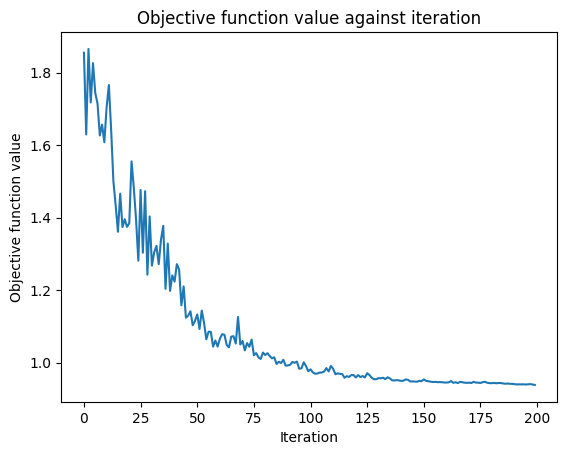

Precision:
 [0.8815151515151515, 0.9700000000000001, 0.8996969696969698, 0.8666666666666667, 0.9396969696969696, 0.7982154882154883, 0.8689562289562289, 0.7381313131313132, 0.9700000000000001, 0.9333333333333333]
Accuracy:
 [0.8666666666666667, 0.9666666666666667, 0.9, 0.8666666666666667, 0.9333333333333333, 0.8, 0.8666666666666667, 0.7, 0.9666666666666667, 0.9333333333333333]
Recall:
 [0.869023569023569, 0.9696969696969697, 0.9023569023569024, 0.8653198653198654, 0.9393939393939394, 0.8047138047138046, 0.872053872053872, 0.7047138047138047, 0.9696969696969697, 0.9326599326599326]
F1:
 [0.870075187969925, 0.966750208855472, 0.8984126984126986, 0.8666666666666667, 0.931670843776107, 0.7951796157059315, 0.8634252297410192, 0.70769820971867, 0.966750208855472, 0.9333333333333333]
Time:
 [221.3878538608551, 218.58791971206665, 219.45379376411438, 222.8707504272461, 223.6518542766571, 224.79093885421753, 221.07271456718445, 221.1790268421173, 219.40701532363892, 220.74868488311768]


In [10]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 200
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = PauliFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.8815151515151515, 0.9700000000000001, 0.8996969696969698, 0.8666666666666667, 0.9396969696969696, 0.7982154882154883, 0.8689562289562289, 0.7381313131313132, 0.9700000000000001, 0.9333333333333333]
**Mean Precision:**
0.886621212121212±0.07048064115314444

**Accuracy:**
 [0.8666666666666667, 0.9666666666666667, 0.9, 0.8666666666666667, 0.9333333333333333, 0.8, 0.8666666666666667, 0.7, 0.9666666666666667, 0.9333333333333333]
**Mean Accuracy:**
0.8800000000000001±0.07774602526460402

**Recall:**
 [0.869023569023569, 0.9696969696969697, 0.9023569023569024, 0.8653198653198654, 0.9393939393939394, 0.8047138047138046, 0.872053872053872, 0.7047138047138047, 0.9696969696969697, 0.9326599326599326]
**Mean Recall:**
0.8829629629629631±0.07719859563297754

**F1:**
 [0.870075187969925, 0.966750208855472, 0.8984126984126986, 0.8666666666666667, 0.931670843776107, 0.7951796157059315, 0.8634252297410192, 0.70769820971867, 0.966750208855472, 0.9333333333333333]
**Mean F1:**
0.8799962203035294±0.07637928550371771


**Time:**
 [221.3878538608551, 218.58791971206665, 219.45379376411438, 222.8707504272461, 223.6518542766571, 224.79093885421753, 221.07271456718445, 221.1790268421173, 219.40701532363892, 220.74868488311768]
**Mean Time:**
221.31505525112152±1.8683701638533041



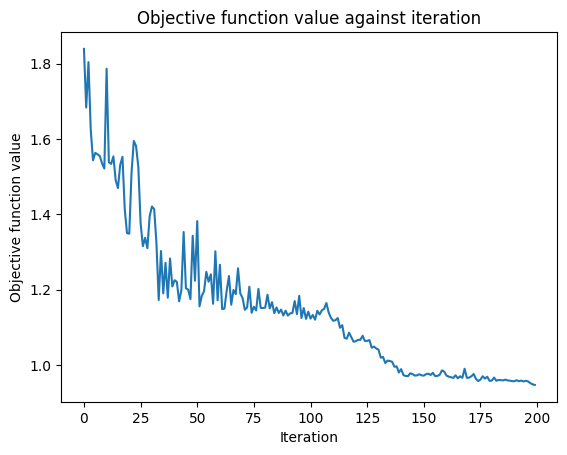

Precision:
 [0.9033333333333334, 0.8702777777777778, 0.8633333333333333, 0.8774410774410775, 0.8774410774410775, 0.9033333333333334, 0.9435897435897436, 0.925, 0.8996969696969698, 0.8663636363636364]
Accuracy:
 [0.9, 0.8666666666666667, 0.8333333333333334, 0.8666666666666667, 0.8666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9, 0.8666666666666667]
Recall:
 [0.9023569023569024, 0.8653198653198654, 0.8356902356902357, 0.872053872053872, 0.872053872053872, 0.9023569023569024, 0.9259259259259259, 0.903030303030303, 0.9023569023569024, 0.8653198653198654]
F1:
 [0.9002506265664162, 0.864374840845429, 0.8391534391534392, 0.8666666666666667, 0.8666666666666667, 0.9002506265664162, 0.9319444444444444, 0.9026455026455025, 0.8984126984126986, 0.8650793650793652]
Time:
 [274.435138463974, 257.8067982196808, 255.6151192188263, 251.80983424186707, 254.13568353652954, 251.8948953151703, 254.7404808998108, 253.43269109725952, 252.83414435386658, 271.62273049354553]


In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 200
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = PauliFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, rotation_blocks=['rz', 'ry'], entanglement_blocks='cz')



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9033333333333334, 0.8702777777777778, 0.8633333333333333, 0.8774410774410775, 0.8774410774410775, 0.9033333333333334, 0.9435897435897436, 0.925, 0.8996969696969698, 0.8663636363636364]
**Mean Precision:**
0.8929810282310283±0.025360973995212338

**Accuracy:**
 [0.9, 0.8666666666666667, 0.8333333333333334, 0.8666666666666667, 0.8666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9, 0.8666666666666667]
**Mean Accuracy:**
0.8833333333333334±0.026874192494328493


**Recall:**
 [0.9023569023569024, 0.8653198653198654, 0.8356902356902357, 0.872053872053872, 0.872053872053872, 0.9023569023569024, 0.9259259259259259, 0.903030303030303, 0.9023569023569024, 0.8653198653198654]
**Mean Recall:**
0.8846464646464647±0.02538470457187571

**F1:**
 [0.9002506265664162, 0.864374840845429, 0.8391534391534392, 0.8666666666666667, 0.8666666666666667, 0.9002506265664162, 0.9319444444444444, 0.9026455026455025, 0.8984126984126986, 0.8650793650793652]
**Mean F1:**
0.8835444877047045±0.025952613388464704

**Time:**
 [274.435138463974, 257.8067982196808, 255.6151192188263, 251.80983424186707, 254.13568353652954, 251.8948953151703, 254.7404808998108, 253.43269109725952, 252.83414435386658, 271.62273049354553]
**Mean Time:**
257.832751584053±7.809174491338472


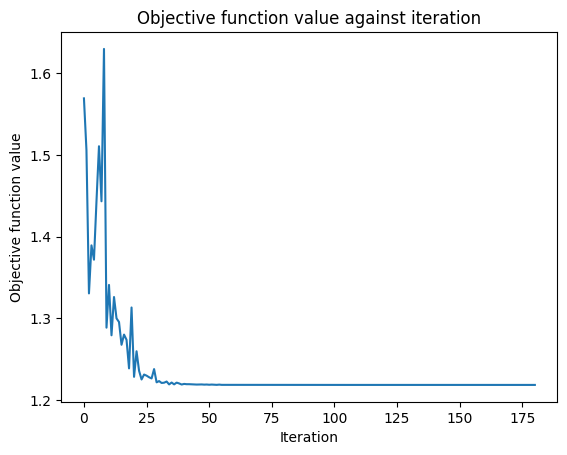

Precision:
 [0.7725274725274726, 0.8025925925925925, 0.8025925925925925, 0.7825396825396825, 0.7725274725274726, 0.675, 0.7688888888888888, 0.8025925925925925, 0.7725274725274726, 0.7725274725274726]
Accuracy:
 [0.7666666666666667, 0.8, 0.8, 0.6, 0.7666666666666667, 0.6666666666666666, 0.7333333333333333, 0.8, 0.7666666666666667, 0.7666666666666667]
Recall:
 [0.7585858585858586, 0.7956228956228957, 0.7956228956228957, 0.6161616161616161, 0.7585858585858586, 0.6579124579124579, 0.7313131313131315, 0.7956228956228957, 0.7585858585858586, 0.7585858585858586]
F1:
 [0.7638888888888888, 0.7999999999999999, 0.7999999999999999, 0.5528742762613731, 0.7638888888888888, 0.6670734808034579, 0.7406698564593301, 0.7999999999999999, 0.7638888888888888, 0.7638888888888888]
Time:
 [72.89148378372192, 96.17149233818054, 86.32699942588806, 104.65460443496704, 100.27997303009033, 104.53412222862244, 104.19733810424805, 79.99154305458069, 104.81671833992004, 96.23795342445374]


In [5]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 200
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = PauliFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

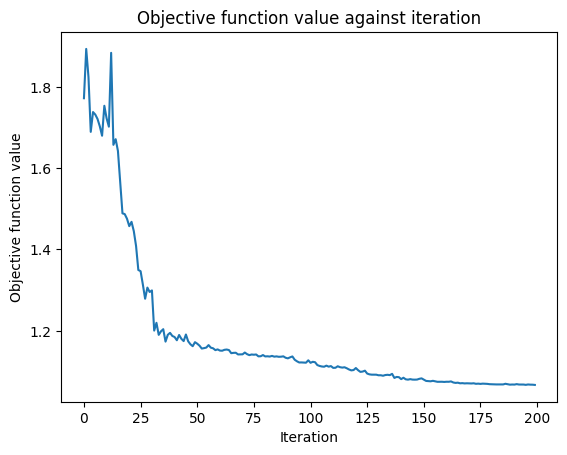

Precision:
 [0.8996969696969698, 0.8996969696969698, 0.8564102564102565, 0.8564102564102565, 0.9396969696969696, 0.9396969696969696, 0.8996969696969698, 0.8996969696969698, 0.8743589743589744, 0.8743589743589744, 0.7523809523809523, 0.7523809523809523, 0.8848484848484849, 0.8848484848484849, 0.8657287157287157, 0.8657287157287157, 0.7523809523809523, 0.7523809523809523, 0.8380952380952381]
Accuracy:
 [0.9, 0.9, 0.8333333333333334, 0.8333333333333334, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9, 0.8333333333333334, 0.8333333333333334, 0.7333333333333333, 0.7333333333333333, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.7333333333333333, 0.7333333333333333, 0.7666666666666667]
Recall:
 [0.9023569023569024, 0.9023569023569024, 0.8282828282828283, 0.8282828282828283, 0.9393939393939394, 0.9393939393939394, 0.9023569023569024, 0.9023569023569024, 0.8454545454545453, 0.8454545454545453, 0.7373737373737373, 0.7373737373737373, 0.869023569023569, 0.8690

In [6]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 200
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = PauliFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

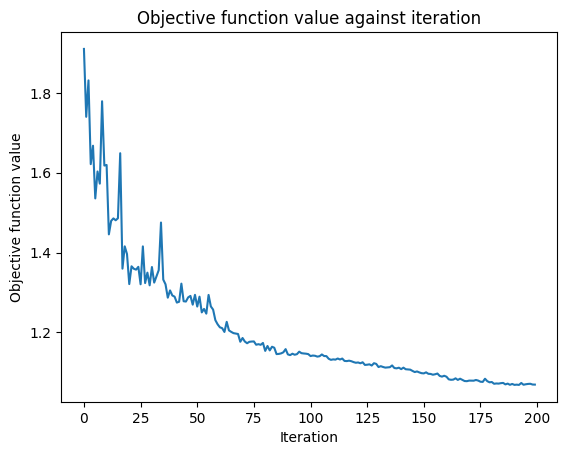

Precision:
 [0.8092592592592592, 0.8092592592592592, 0.9111111111111112, 0.9111111111111112, 0.8693939393939393, 0.8693939393939393, 0.7819624819624821, 0.7819624819624821, 0.9363636363636363, 0.9363636363636363, 0.8689562289562289, 0.8689562289562289, 0.8996969696969698, 0.8996969696969698, 0.8897435897435898, 0.8897435897435898, 0.762012987012987, 0.762012987012987, 0.8791666666666667]
Accuracy:
 [0.8, 0.8, 0.9, 0.9, 0.8666666666666667, 0.8666666666666667, 0.7666666666666667, 0.7666666666666667, 0.9333333333333333, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 0.9, 0.9, 0.8666666666666667, 0.8666666666666667, 0.7333333333333333, 0.7333333333333333, 0.8666666666666667]
Recall:
 [0.8016835016835017, 0.8016835016835017, 0.9023569023569024, 0.9023569023569024, 0.869023569023569, 0.869023569023569, 0.7818181818181819, 0.7818181818181819, 0.9326599326599326, 0.9326599326599326, 0.872053872053872, 0.872053872053872, 0.9023569023569024, 0.9023569023569024, 0.872053872053872, 0.

In [7]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 200
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = PauliFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)


  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

In [11]:

t = np.mean(times)
t_std = np.std(times)
p = np.mean(precisions)
p_std = np.std(precisions)
a = np.mean(accuracies)
a_std = np.std(accuracies)
f = np.mean(f1s)
f_std = np.std(f1s)
r = np.mean(recalls)
r_std = np.std(recalls)
  
print(f"Mean Precision: {p}±{p_std}")
print(f"Mean Accuracy: {a}±{a_std}")
print(f"Mean Recall: {r}±{r_std}")
print(f"Mean F1: {f}±{f_std}")
print(f"Mean Time: {t}±{t_std}")

Mean Precision: 0.860766687016687±0.054497849529947635
Mean Accuracy: 0.85±0.060092521257733164
Mean Recall: 0.8537373737373735±0.05701624289518082
Mean F1: 0.8482242368690072±0.06194792808567067
Mean Time: 118.7810975074768±14.984860575416997


In [13]:
Precision = [0.8996969696969698, 0.8996969696969698, 0.8564102564102565, 0.8564102564102565, 0.9396969696969696, 0.9396969696969696, 0.8996969696969698, 0.8996969696969698, 0.8743589743589744, 0.8743589743589744, 0.7523809523809523, 0.7523809523809523, 0.8848484848484849, 0.8848484848484849, 0.8657287157287157, 0.8657287157287157, 0.7523809523809523, 0.7523809523809523, 0.8380952380952381, 0.8380952380952381]
Accuracy = [0.9, 0.9, 0.8333333333333334, 0.8333333333333334, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9, 0.8333333333333334, 0.8333333333333334, 0.7333333333333333, 0.7333333333333333, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.7333333333333333, 0.7333333333333333, 0.7666666666666667, 0.7666666666666667]
Recall = [0.9023569023569024, 0.9023569023569024, 0.8282828282828283, 0.8282828282828283, 0.9393939393939394, 0.9393939393939394, 0.9023569023569024, 0.9023569023569024, 0.8454545454545453, 0.8454545454545453, 0.7373737373737373, 0.7373737373737373, 0.869023569023569, 0.869023569023569, 0.8585858585858586, 0.8585858585858586, 0.7373737373737373, 0.7373737373737373, 0.7781144781144781, 0.7781144781144781]
F1 = [0.8984126984126986, 0.8984126984126986, 0.8298550724637682, 0.8298550724637682, 0.931670843776107, 0.931670843776107, 0.8984126984126986, 0.8984126984126986, 0.8306397306397305, 0.8306397306397305, 0.7222222222222221, 0.7222222222222221, 0.87, 0.87, 0.8613008971704624, 0.8613008971704624, 0.7222222222222221, 0.7222222222222221, 0.7675191815856778, 0.7675191815856778]
Time = [115.15256381034851, 115.15256381034851, 113.77236533164978, 113.77236533164978, 112.65724992752075, 112.65724992752075, 112.21517181396484, 112.21517181396484, 113.76667761802673, 113.76667761802673, 114.05929899215698, 114.05929899215698, 114.50670313835144, 114.50670313835144, 114.8037428855896, 114.8037428855896, 98.94698071479797, 98.94698071479797, 86.55123662948608, 86.55123662948608]

t = np.mean(Time)
t_std = np.std(Time)
p = np.mean(Precision)
p_std = np.std(Precision)
a = np.mean(Accuracy)
a_std = np.std(Accuracy)
f = np.mean(F1)
f_std = np.std(F1)
r = np.mean(Recall)
r_std = np.std(Recall)
  
print(f"Mean Precision: {p}±{p_std}")
print(f"Mean Accuracy: {a}±{a_std}")
print(f"Mean Recall: {r}±{r_std}")
print(f"Mean F1: {f}±{f_std}")
print(f"Mean Time: {t}±{t_std}")


Mean Precision: 0.8563294483294482±0.05820777052187767
Mean Accuracy: 0.8366666666666666±0.0674124947205223
Mean Recall: 0.8398316498316498±0.0662605475160508
Mean F1: 0.8332255566905588±0.07022082367847364
Mean Time: 109.64319908618927±8.930511602569197


In [14]:
Precision = [0.7725274725274726, 0.8025925925925925, 0.8025925925925925, 0.7825396825396825, 0.7725274725274726, 0.675, 0.7688888888888888, 0.8025925925925925, 0.7725274725274726, 0.7725274725274726]
Accuracy = [0.7666666666666667, 0.8, 0.8, 0.6, 0.7666666666666667, 0.6666666666666666, 0.7333333333333333, 0.8, 0.7666666666666667, 0.7666666666666667]
Recall = [0.7585858585858586, 0.7956228956228957, 0.7956228956228957, 0.6161616161616161, 0.7585858585858586, 0.6579124579124579, 0.7313131313131315, 0.7956228956228957, 0.7585858585858586, 0.7585858585858586]
F1 = [0.7638888888888888, 0.7999999999999999, 0.7999999999999999, 0.5528742762613731, 0.7638888888888888, 0.6670734808034579, 0.7406698564593301, 0.7999999999999999, 0.7638888888888888, 0.7638888888888888]
Time = [72.89148378372192, 96.17149233818054, 86.32699942588806, 104.65460443496704, 100.27997303009033, 104.53412222862244, 104.19733810424805, 79.99154305458069, 104.81671833992004, 96.23795342445374]
t = np.mean(Time)
t_std = np.std(Time)
p = np.mean(Precision)
p_std = np.std(Precision)
a = np.mean(Accuracy)
a_std = np.std(Accuracy)
f = np.mean(F1)
f_std = np.std(F1)
r = np.mean(Recall)
r_std = np.std(Recall)
  
print(f"Mean Precision: {p}±{p_std}")
print(f"Mean Accuracy: {a}±{a_std}")
print(f"Mean Recall: {r}±{r_std}")
print(f"Mean F1: {f}±{f_std}")
print(f"Mean Time: {t}±{t_std}")


Mean Precision: 0.7724316239316239±0.03512368716675037
Mean Accuracy: 0.7466666666666667±0.061824123303304716
Mean Recall: 0.7426599326599327±0.05722104093567924
Mean F1: 0.7416173169079716±0.07306936519778943
Mean Time: 95.01022281646729±10.886289826565815
